In [ ]:
from google.colab import files
uploaded = files.upload()

Saving habbit_data_1500.xlsx to habbit_data_1500.xlsx


In [ ]:
import io
myfile = io.BytesIO(uploaded['habbit_data_1500.xlsx'])

In [ ]:
import pandas as pd
myfile.seek(0)
df = pd.read_excel(myfile)

In [ ]:
df.shape

(1499, 7)

In [ ]:
df.columns

Index(['streak_length', 'day_of_week', 'time_of_day', 'previous_success_rate',
       'habit_category', 'user_age_group', 'will_continue_habit'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=1499, step=1)

In [ ]:
df.describe()

,streak_length,day_of_week,time_of_day,previous_success_rate,will_continue_habit
count,1499.000000,1499.000000,1499.000000,1499.000000,1499.000000
mean,50.384256,2.991995,13.985991,0.562702,0.868579
std,28.601057,2.006648,5.507775,0.235834,0.337973
min,1.000000,0.000000,5.000000,0.106000,0.000000
25%,26.000000,1.000000,9.000000,0.357500,1.000000
50%,50.000000,3.000000,14.000000,0.565000,1.000000
75%,75.000000,5.000000,19.000000,0.759500,1.000000
max,100.000000,6.000000,23.000000,0.980000,1.000000


In [ ]:
df.head()

,streak_length,day_of_week,time_of_day,previous_success_rate,habit_category,user_age_group,will_continue_habit
0,86,6,14,0.208,reading,adult,0
1,30,5,16,0.751,exercise,teen,1
2,100,2,19,0.355,study,teen,1
3,50,1,17,0.852,study,teen,1
4,71,2,14,0.479,meditation,teen,1


In [ ]:
df.tail()

,streak_length,day_of_week,time_of_day,previous_success_rate,habit_category,user_age_group,will_continue_habit
1494,60,0,6,0.430,meditation,teen,1
1495,2,5,17,0.980,meditation,adult,1
1496,18,6,14,0.768,health,senior,1
1497,4,3,17,0.420,study,adult,0
1498,28,4,5,0.884,study,senior,1


In [ ]:
df.sample(20)

,streak_length,day_of_week,time_of_day,previous_success_rate,habit_category,user_age_group,will_continue_habit
665,71,2,15,0.253,study,adult,1
453,40,4,16,0.439,exercise,adult,1
1370,86,1,21,0.516,health,teen,1
1371,83,2,18,0.851,reading,teen,1
401,77,0,6,0.490,study,senior,1
1147,16,1,12,0.673,meditation,adult,1
439,65,5,23,0.312,health,senior,1
934,93,1,20,0.346,meditation,senior,1
1496,18,6,14,0.768,health,senior,1
18,10,1,8,0.677,exercise,teen,0


In [ ]:
df['will_continue_habit'].value_counts()

,count
will_continue_habit,
1,1302
0,197


In [ ]:
import matplotlib.pyplot as plt

(array([143., 150., 148., 165., 158., 161., 133., 135., 156., 150.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

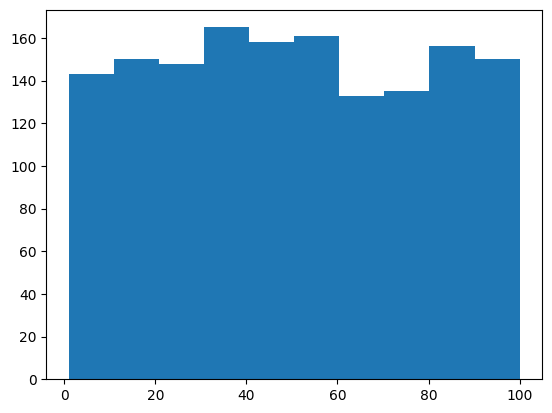

In [ ]:
plt.hist(df['streak_length'])

<BarContainer object of 2 artists>

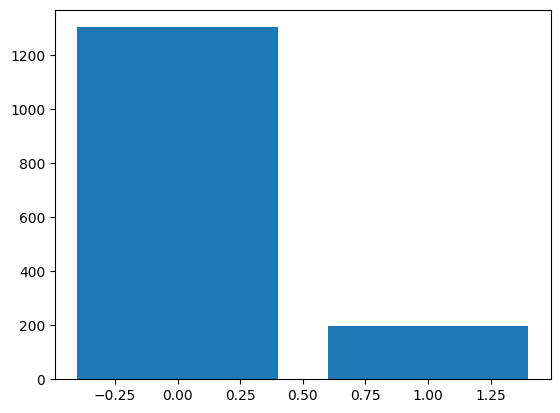

In [ ]:
plt.bar([0,1],df['will_continue_habit'].value_counts())

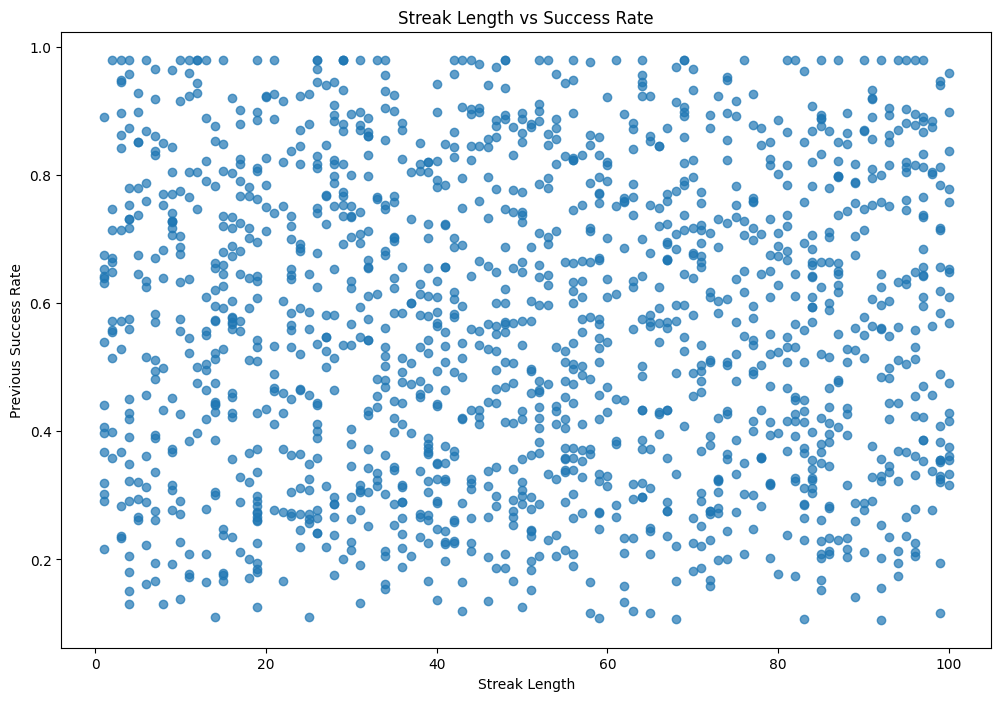

In [ ]:
plt.figure(figsize=(12, 8))
# 1. Streak Length vs Previous Success Rate
plt.scatter(df['streak_length'], df['previous_success_rate'], alpha=0.7)
plt.xlabel('Streak Length')
plt.ylabel('Previous Success Rate')
plt.title('Streak Length vs Success Rate')
plt.show()

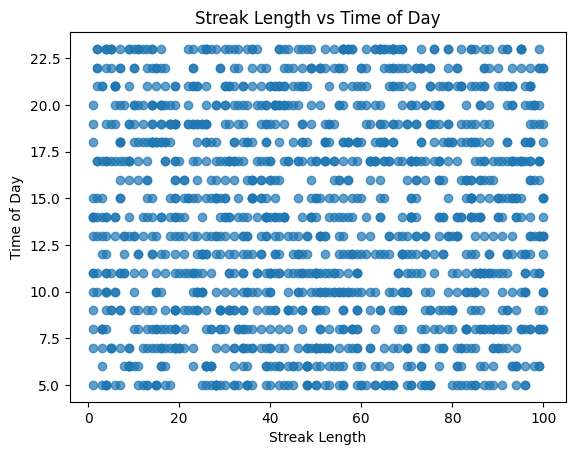

In [ ]:
# 2. Streak Length vs Time of Day
plt.scatter(df['streak_length'], df['time_of_day'], alpha=0.7)
plt.xlabel('Streak Length')
plt.ylabel('Time of Day')
plt.title('Streak Length vs Time of Day')
plt.show()

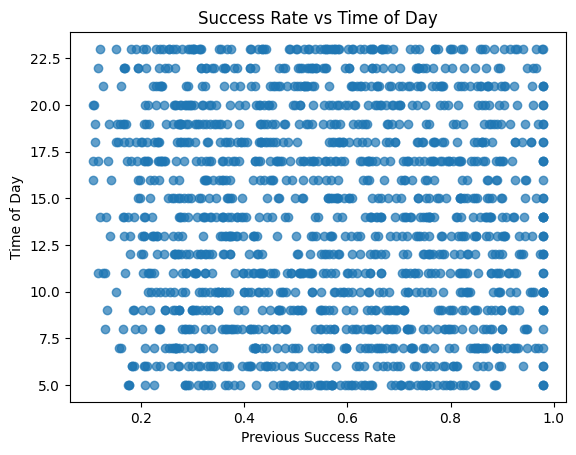

In [ ]:
# 3. Previous Success Rate vs Time of Day
plt.scatter(df['previous_success_rate'], df['time_of_day'], alpha=0.7)
plt.xlabel('Previous Success Rate')
plt.ylabel('Time of Day')
plt.title('Success Rate vs Time of Day')
plt.show()

In [ ]:
import numpy as np

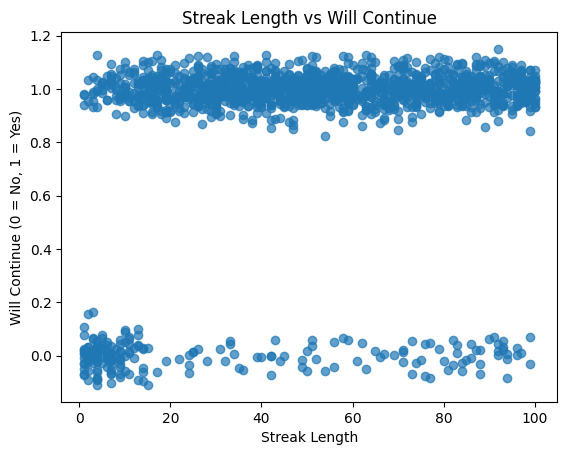

In [ ]:
# 4. Streak Length vs Will Continue Habit (jittered)
plt.scatter(df['streak_length'], df['will_continue_habit'] + (0.05 * np.random.randn(len(df))), alpha=0.7)
plt.xlabel('Streak Length')
plt.ylabel('Will Continue (0 = No, 1 = Yes)')
plt.title('Streak Length vs Will Continue')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_habit = LabelEncoder()
le_age = LabelEncoder()

df['habit_encoded'] = le_habit.fit_transform(df['habit_category'])
df['age_encoded'] = le_age.fit_transform(df['user_age_group'])

In [ ]:
# Select your input features (X) and target variable (y)
x = df[['streak_length','day_of_week','time_of_day','previous_success_rate','habit_encoded','age_encoded']]
y = df['will_continue_habit']

print("Features shape:", x.shape)
print("Target shape:", y.shape)

Features shape: (1499, 6)
Target shape: (1499,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train ,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Total samples: {len(x)}")

Training set: 1199 samples
Testing set: 300 samples
Total samples: 1499


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression(random_state = 42)

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.3f}")
print(f"Model accuracy percentage: {accuracy*100:.1f}%")

Model accuracy: 0.923
Model accuracy percentage: 92.3%


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

In [ ]:
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

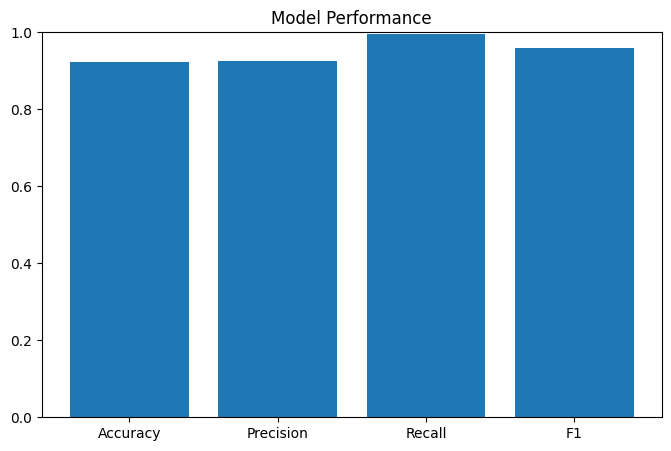

In [ ]:
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
plt.figure(figsize=(8, 5))
plt.bar(labels, metrics)
plt.title('Model Performance')
plt.ylim(0, 1)
plt.show()

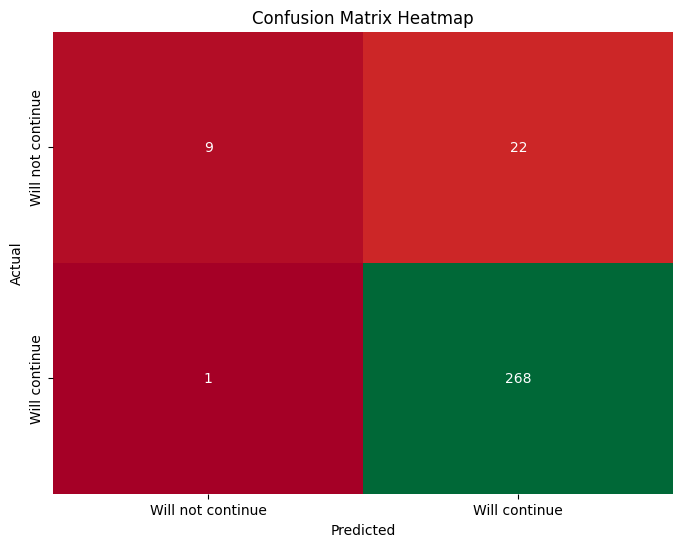

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
            xticklabels=['Will not continue', 'Will continue'],
            yticklabels=['Will not continue', 'Will continue'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
# Test with new data
streak_days = 15
day_of_week = 1  # Monday
hour = 6   # 24 Hour Foramt
success_rate = 0.6
habit_code = 2  # exercise
age_code = 2    # adult

new_person = [[streak_days, day_of_week, hour, success_rate, habit_code, age_code]]
prediction = model.predict(new_person)[0]

print(f"New Person Data:")
print(f"{streak_days}-day streak, day {day_of_week}, {hour}am, {success_rate*100}% past success")
print(f"Prediction: {'Will continue habit' if prediction == 1 else 'Will not continue habit'}")

New Person Data:
15-day streak, day 1, 6am, 60.0% past success
Prediction: Will continue habit


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
